# MONDAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file= pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [4]:
print(file['vehicle_size'].apply(type).value_counts())

<class 'str'>    10689
Name: vehicle_size, dtype: int64


In [5]:
# Create a data frame only with the columns that have numeric values
numerical = file.select_dtypes(include='number')

categorical = file.select_dtypes(exclude='number')

In [6]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

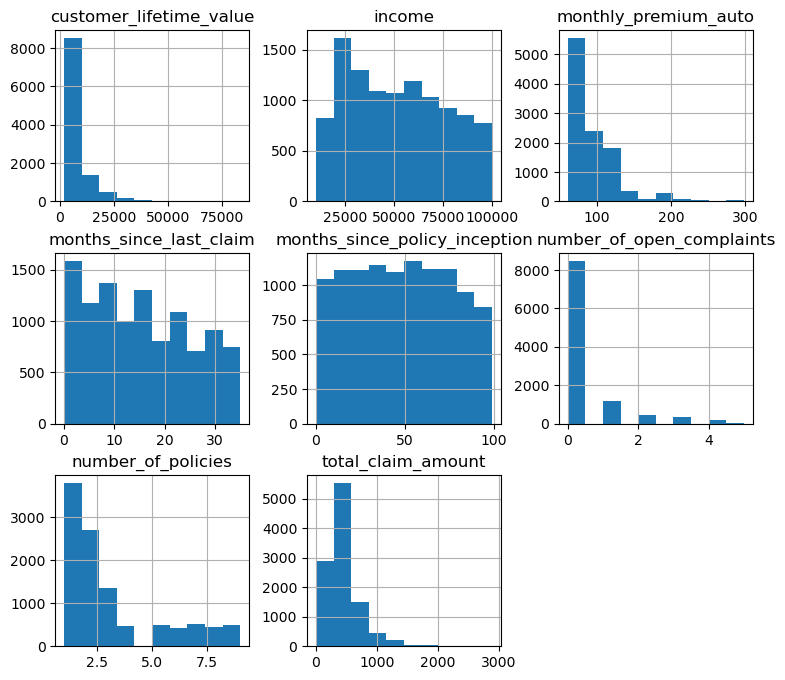

In [7]:
file.hist(figsize=(9,8))

<AxesSubplot:>

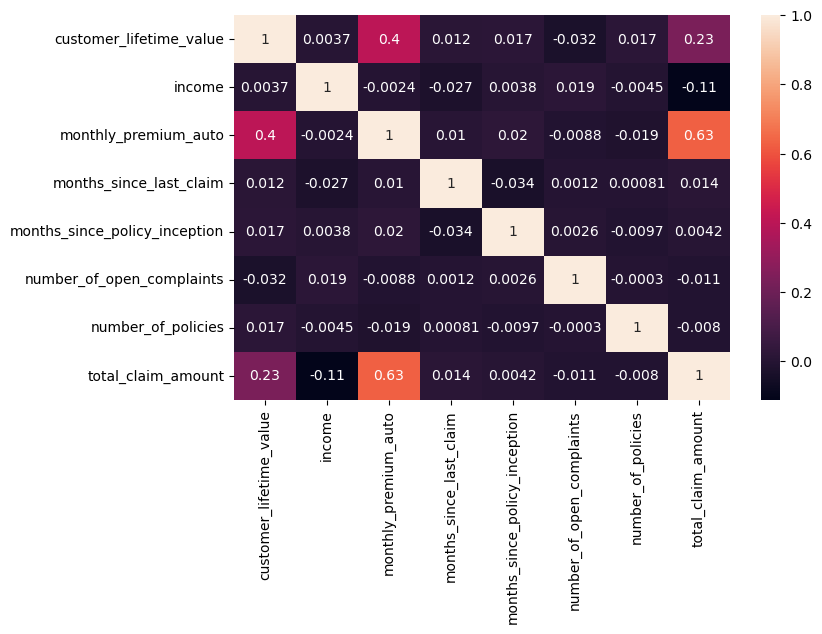

In [8]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

In [10]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [11]:
from sklearn.preprocessing import OneHotEncoder 

In [12]:
import pandas as pd
one_hot_nominal = pd.get_dummies(categorical, columns=['region','response','employment_status','gender','location_code','marital_status','marital_status','policy_type','sales_channel','policy','renew_offer_type','vehicle_class'], drop_first = True)

In [13]:
one_hot_nominal

,coverage,education,effective_to_date,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,feb,medsize,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,medsize,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,2/10/11,feb,medsize,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,jan,medsize,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,jan,medsize,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,medsize,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,1/6/11,jan,medsize,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,feb,medsize,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,feb,medsize,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [14]:
unique_coverage = categorical['coverage'].unique()
unique_coverage

array(['basic', 'extended', 'premium'], dtype=object)

In [15]:
def replacer(col_name,old_vals,new_vals):
    for i in range(len(old_vals)):
        categorical.loc[categorical[col_name] == old_vals[i], col_name] = new_vals[i]
    
    return categorical[col_name]

In [16]:
categorical.month.unique()

array(['feb', 'jan'], dtype=object)

In [17]:
ordinals = pd.DataFrame()

In [18]:
ordinals['coverage']=replacer('coverage',list(categorical.coverage.unique()), [0,1,2] )

In [19]:
ordinals['education'] = replacer('education', list(categorical.education.unique()), [1,2,0,4,3])

In [24]:
ordinals['vehicle_size'] = replacer('vehicle_size', list(categorical.vehicle_size.unique()), [1,0,2])

In [25]:
ordinals['month'] = replacer('month', list(categorical.month.unique()), [1,0])

In [26]:
ordinals

,coverage,education,month,vehicle_size
0,0,1,1,1
1,0,1,1,1
2,0,2,1,1
3,1,1,1,1
4,2,2,1,1
...,...,...,...,...
10684,2,2,1,1
10685,0,1,1,1
10686,1,2,1,1
10687,2,1,1,1


In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.set_palette('pastel')
for i, col in enumerate(numerical):
    sns.histplot(data=numerical, x=col, color="pink", kde=True, ax=axs[i//4, i%4])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numerical[['income']])
numerical['income_enc']=scaler.transform(numerical[['income']])
sns.displot(numerical['income_enc'])


# Tuesday

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [28]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [29]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df


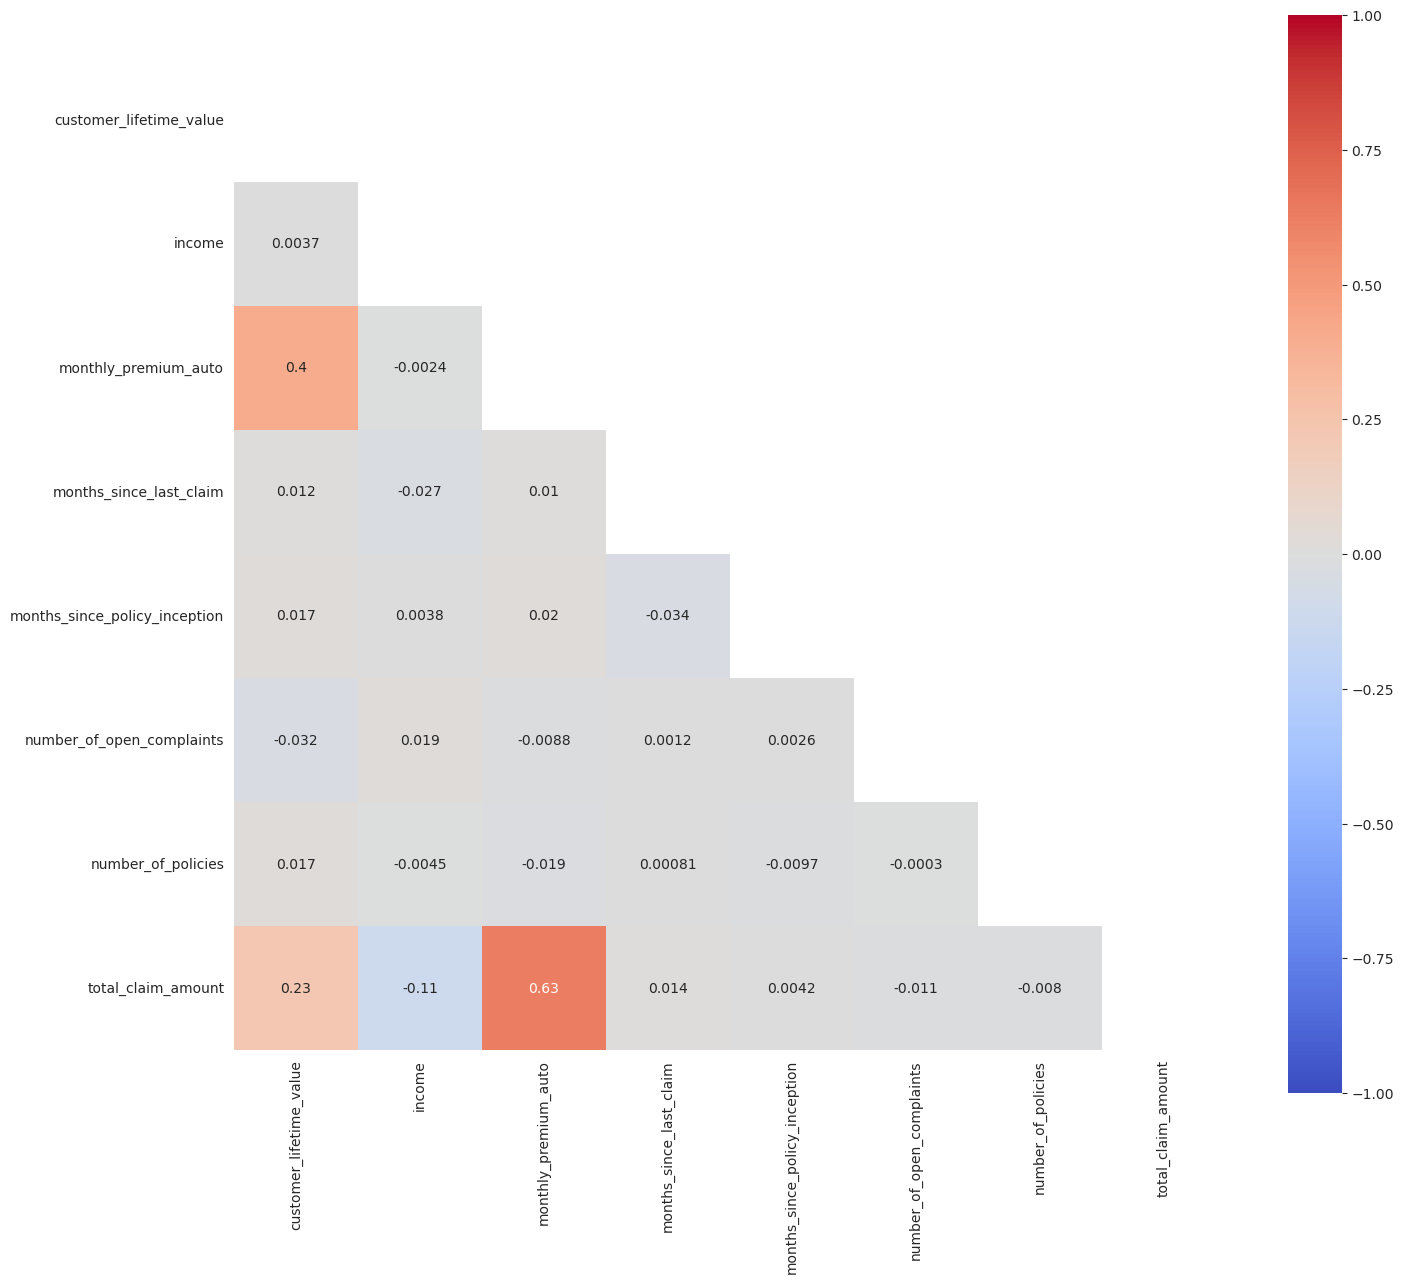

In [30]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [31]:
CORR_THRESH = 0.80
corr_matrix=numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corrd_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > CORR_THRESH)]
numerical.drop(corrd_cols,axis=1,inplace=True)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

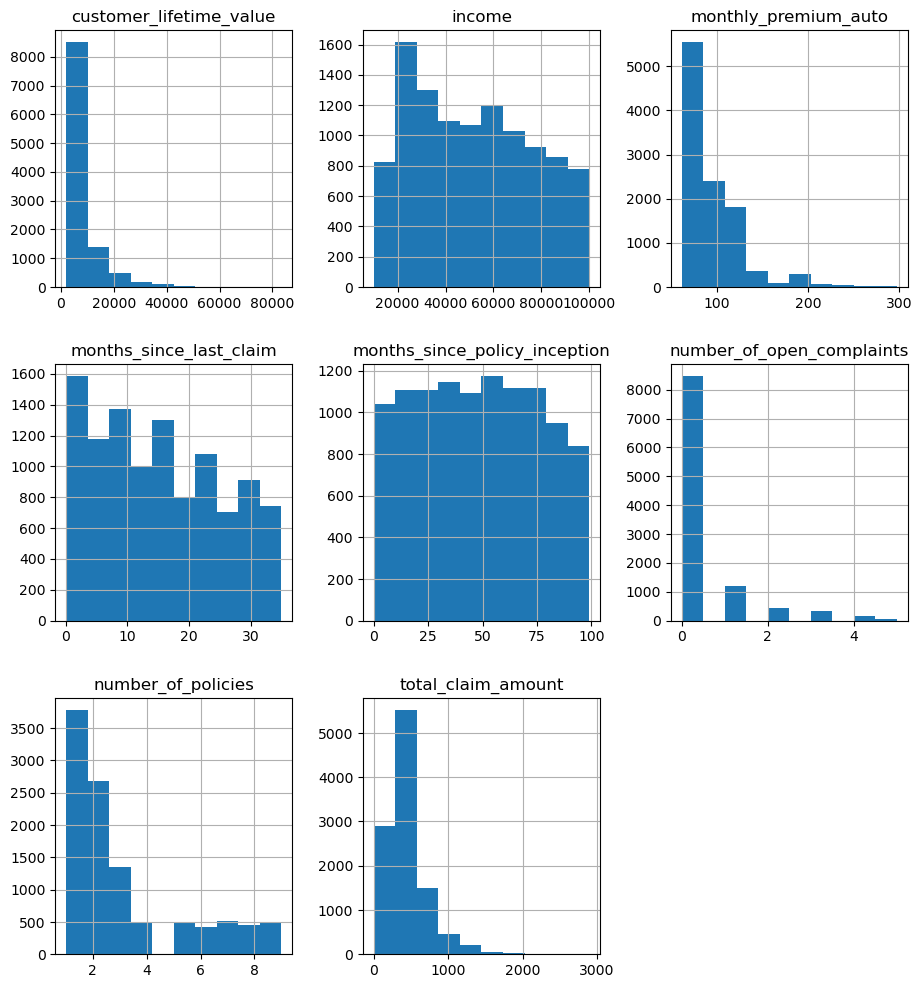

In [32]:
numerical.hist(figsize=(11,12))

/Users/yaren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

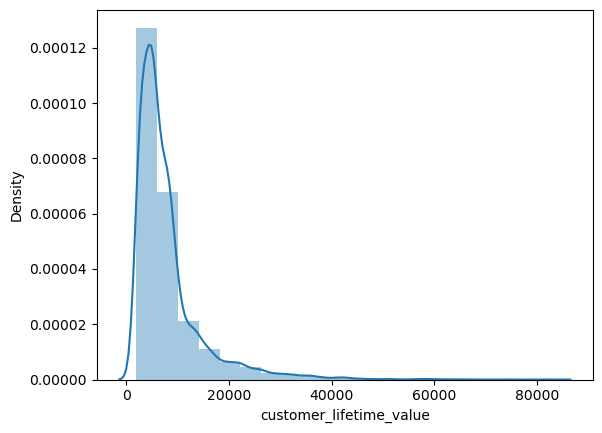

In [33]:
sns.distplot((numerical['customer_lifetime_value']), bins=20)

In [34]:
X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount

In [ ]:
X.isna().any()

In [35]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [36]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
4975,8543,99180,106,15,20,0,3
5736,5107,96207,77,2,71,0,9
4298,21147,49721,132,18,49,0,2


In [38]:
pt = PowerTransformer()

In [41]:
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())

X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [42]:
model=LinearRegression()   
model.fit(X_train_ct, y_train) 

LinearRegression()

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train_ct, y_train)

In [43]:
model.coef_

array([[ -0.39095792, -31.67822762, 163.06679552,   3.90426888,
          0.40651324,  -4.78362894,  -1.01987199]])

In [45]:
model.intercept_

array([436.21184175])

In [46]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     489.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:14:14   Log-Likelihood:                -51792.
No. Observations:                7482   AIC:                         1.036e+05
Df Residuals:                    7474   BIC:                         1.037e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        436.2118      2.839    153.624      0.0